In [8]:
## Load all required packages
%pylab inline --no-import-all
import numpy as np
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.metrics import CategoricalAccuracy, categorical_accuracy
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [65]:
from keras import Sequential
from keras import layers
from keras import models

### PUT YOUR CODE HERE ###
# Create a sequential model
model = Sequential()


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [66]:
### PUT YOUR CODE HERE ###
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(26, activation='softmax'))
### END ###

In [67]:
lr = 0.001
opt = Adam(lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ["accuracy", "categorical_accuracy"])

In [68]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [69]:
## Check shapes and types of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [70]:
## Split into train and val sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [71]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [72]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
train_images = x_train.astype('float32') / 255
print(x_train.shape)

(99840, 28, 28, 1)


In [73]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
test_images = x_test.astype('float32') / 255
print(x_test.shape)

(24960, 28, 28, 1)


In [74]:
## Encode categorical label data

lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.fit_transform(y_test)

In [75]:
# Check the shape after the split
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(99840, 28, 28, 1)
(99840, 26)
(24960, 28, 28, 1)
(24960, 26)


In [62]:
print(train_labels[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [76]:
history = model.fit(train_images, train_labels,
          batch_size=128, epochs=5,
          verbose=1,
          validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 99840 samples, validate on 24960 samples
Epoch 1/5
99840/99840 [==============================] - 169s 2ms/step - loss: 0.6882 - accuracy: 0.7888 - categorical_accuracy: 0.7888 - val_loss: 0.3676 - val_accuracy: 0.8811 - val_categorical_accuracy: 0.8811
Epoch 2/5
99840/99840 [==============================] - 189s 2ms/step - loss: 0.3041 - accuracy: 0.9004 - categorical_accuracy: 0.9004 - val_loss: 0.2858 - val_accuracy: 0.9060 - val_categorical_accuracy: 0.9060
Epoch 3/5
99840/99840 [==============================] - 189s 2ms/step - loss: 0.2459 - accuracy: 0.9181 - categorical_accuracy: 0.9181 - val_loss: 0.2531 - val_accuracy: 0.9164 - val_categorical_accuracy: 0.9164
Epoch 4/5
99840/99840 [==============================] - 219s 2ms/step - loss: 0.2133 - accuracy: 0.9288 - categorical_accuracy: 0.9288 - val_loss: 0.2386 - val_accuracy: 0.9213 - val_categorical_accuracy: 0.9213
Epoch 5/5
99840/99840 [===========================

In [80]:
loss_and_metrics_train = model.evaluate(train_images, train_labels, verbose=2)
loss_and_metrics = model.evaluate(test_images, test_labels, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Validation Loss", loss_and_metrics[0])
print("Validation Accuracy", loss_and_metrics[1])

Train Loss 0.17815348450333263
Train Accuracy 0.939182698726654

Validation Loss 0.22333427120525484
Validation Accuracy 0.9254807829856873


In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

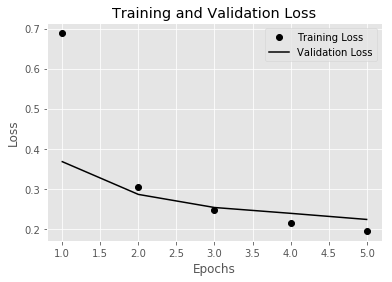

In [83]:
epochs = range(1, 6)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Training and Validation Loss.png')

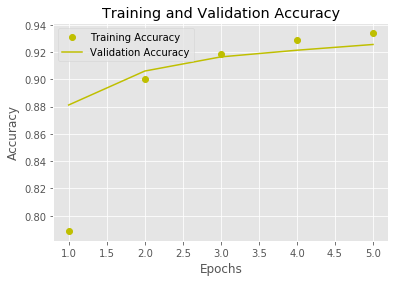

In [84]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('Training and Validation Accuracy.png')